#**INTRODUCTION**

What is Credit Card ?<br>
A credit card is a type of payment card that lets you borrow money from a bank or credit card company up to a certain limit. You can use the card to make purchases and pay it back later, but you'll have to pay interest and fees.

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
- Credit card data analysis is important in today's world because it can help banks and financial institutions make more accurate and informed decisions about who to give loans or credit to.
- By analyzing a client's credit card usage patterns, financial history, and other relevant data, banks can better understand the client's financial behavior and creditworthiness.
- It helps them minimize the risk of lending money to someone who may not be able to repay the loan, defult and fraud.

2. How is it going to impact the banking sector?
- credit card data analysis can help banks make more informed and accurate decisions, reduce risk, improve customer experience, and increase efficiency and enhance fraud detection.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India ?
- Credit limit determinations can be improved by considering factors beyond just CIBIL score.
- Limited data availability in terms of quality and quantity for analysis due to data privacy regulations or the reluctance of clients to share their financial information.
- By giving more importance to the high-value customer.

#**DATA COLLECTION & INTEGRATION**

In [1]:
# Importing the libraries.
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading features dataset.
features = pd.read_csv("Credit_card.csv")
features.columns = [x.lower() for x in features.columns]
features.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
# Checking the shape of the dataset.
features.shape

(1548, 18)

In [4]:
# Reading label dataset.
label = pd.read_csv("Credit_card_label.csv")
label.columns = [x.lower() for x in label.columns]
label.head()

,ind_id,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
# Checking the shape of the data set.
label.shape

(1548, 2)

In [6]:
# Combining two dataset.
df = pd.merge(features, label, how='inner', on='ind_id')
df.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


- There are missing values in multiple columns, in form of NaN.
- Type_Occupation has many missing values.

In [7]:
# checking the shape of the data set("including total numbers of observations and variables")
df.shape

(1548, 19)

#**EXPLORE DATA**

In [8]:
df.describe(include = 'all')

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [9]:
# Rename variables
df.rename(columns = {'propert_owner': 'property_owner'}, inplace=True)

In [10]:
# dropping unnecessary columns
df = df.drop(['mobile_phone',	'work_phone',	'phone', 'email_id'], axis = 1)

In [11]:
# Checking if datatypes are read correctly
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ind_id           1548 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1548 non-null   object 
 3   property_owner   1548 non-null   object 
 4   children         1548 non-null   int64  
 5   annual_income    1525 non-null   float64
 6   type_income      1548 non-null   object 
 7   education        1548 non-null   object 
 8   marital_status   1548 non-null   object 
 9   housing_type     1548 non-null   object 
 10  birthday_count   1526 non-null   float64
 11  employed_days    1548 non-null   int64  
 12  type_occupation  1060 non-null   object 
 13  family_members   1548 non-null   int64  
 14  label            1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 882.8 KB


- There are missing values in gender, annual_income, birthday_count & type_accupation.
- Type_Occupation has many missing values.

| Variables | Category |Datatype|
|:---------|----------:|----------:|
| ind_id | Discrete | numeric |
| gender | Nominal | categoric |
| car_owner | Nominal | categoric |
| propert_owner | Ordinal | categoric |
| children |Nominal | categoric |
| annual_income | Continuous | numeric |
| type_income | Nominal | categoric |
| education | Ordinal | categoric |
| marital_status | Nominal | categoric |
| housing_type | Nominal | categoric |
| birthday_count | Discrete | numeric |
| employed_days | Discrete | numeric |
| type_occupation | Ordinal | categoric |
| family_members | Nominal | categoric |
| label | Nominal | categoric |

In [12]:
# Unique values in each variables
df.nunique() 

ind_id             1548
gender                2
car_owner             2
property_owner        2
children              6
annual_income       115
type_income           4
education             5
marital_status        5
housing_type          6
birthday_count     1270
employed_days       956
type_occupation      18
family_members        7
label                 2
dtype: int64

In [13]:
# Finding duplicates and drop them
df.drop_duplicates()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2,0


In this dataset there are no duplicate values.

In [14]:
# Checking Null values
df.isnull().sum()

ind_id               0
gender               7
car_owner            0
property_owner       0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
birthday_count      22
employed_days        0
type_occupation    488
family_members       0
label                0
dtype: int64

In [15]:
# Checking Null values in Percentage
df.isnull().mean()*100

ind_id              0.000000
gender              0.452196
car_owner           0.000000
property_owner      0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
birthday_count      1.421189
employed_days       0.000000
type_occupation    31.524548
family_members      0.000000
label               0.000000
dtype: float64

There are missing values in 4 features.

#**FEATURE ENGINEERING**

###Feature Transformation

#####Column : birthday_Count --> age

In [16]:
print(df.shape)
# Extracting out the rows which are greater then 0 in birthday_count.
df[df["birthday_count"]>=0]

(1548, 15)


,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,type_occupation,family_members,label


In [17]:
# Renaming the 'brthday_count' to age by dividing 365 .
df.rename(columns = {'birthday_count':'age'}, inplace = True )
df['age']= round(abs(df['age']/365))

#####Column : employed_days --> experience

In [18]:
print(df.shape)
# Extracting out the rows which are greater then 0 in Employed Days.
df['employed_days'][df['employed_days']>=0] = 0

(1548, 15)


In [19]:
# Renaming the "employed_days" to "experience" by dividing 365 to get Experience.
df.rename(columns = {"employed_days" : "experience"}, inplace=True) 
df["experience"] = round(abs(df["experience"]/365),1)

Skewness of Experience :  1.7300609167294572


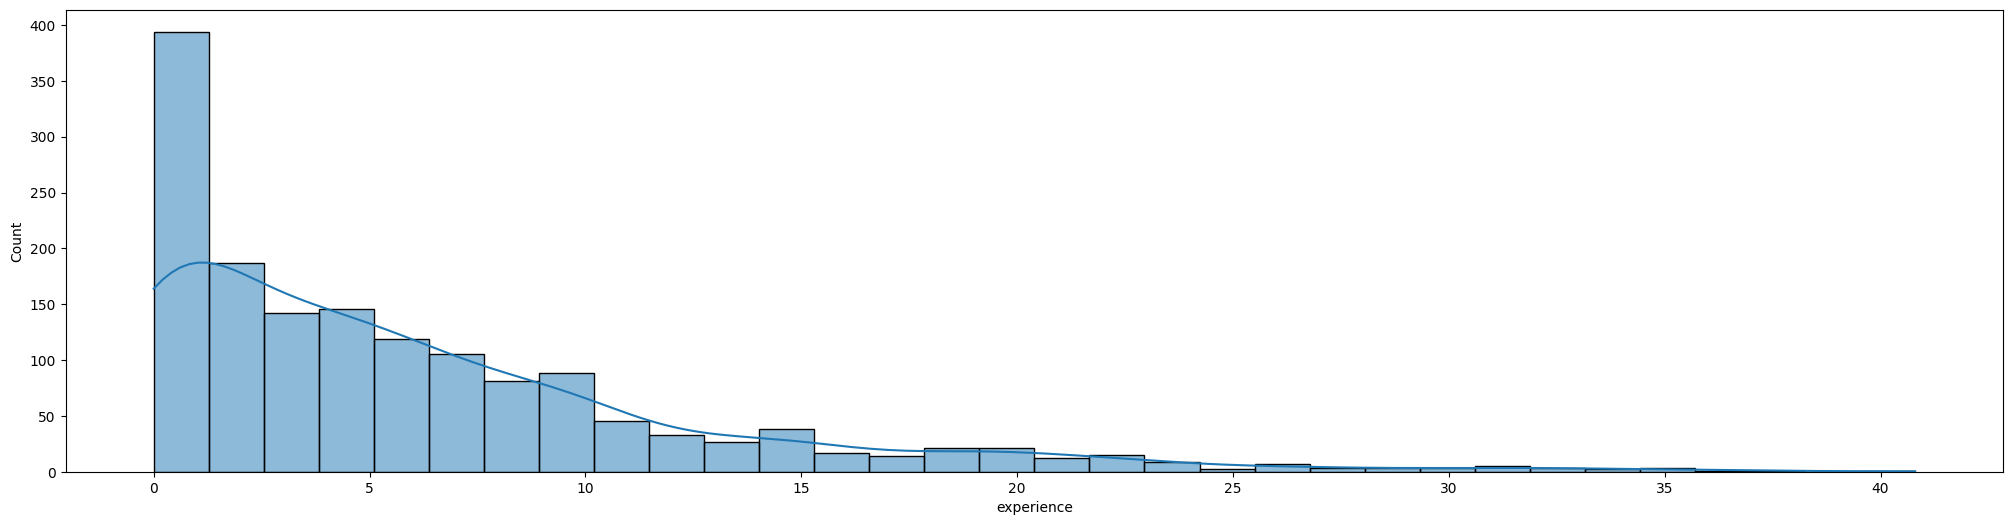

In [20]:
# Plotting Experience feature.
plt.figure(figsize=(25,6))
sns.histplot(df["experience"], kde = True)
print("Skewness of Experience : ", df["experience"].skew())

Skewness of Square root of  Experience :  0.2617332299127787


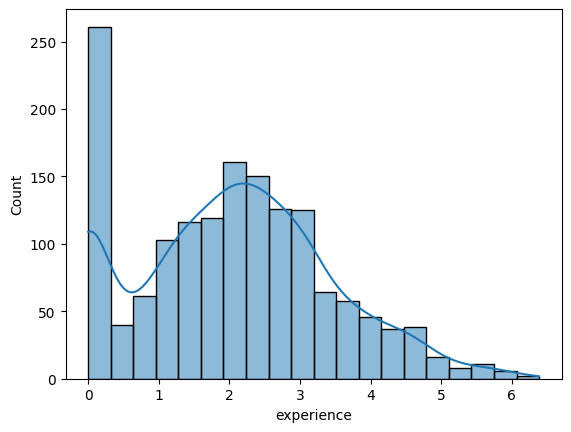

In [21]:
# Square-Root Transformation and plot.
sns.histplot(np.sqrt(df["experience"]), kde = True)
print("Skewness of Square root of  Experience : ", np.sqrt(df["experience"]).skew())
plt.show()

In [22]:
# Replacing the feature with transformed figure.
df["experience1"] = df['experience'].copy()
df["experience"] = np.sqrt(df["experience"])

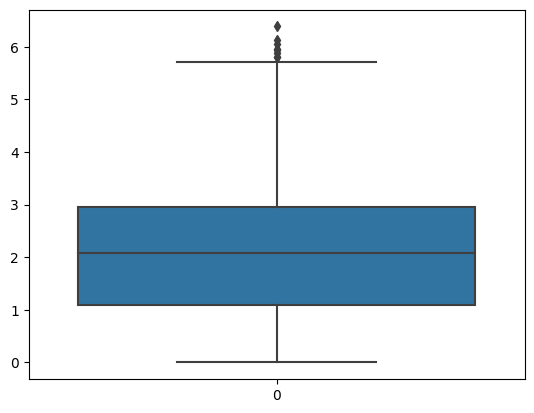

In [23]:
# Viewing Outliers from the boxplot.
sns.boxplot(df["experience"])
plt.show()

<Axes: xlabel='experience', ylabel='Count'>

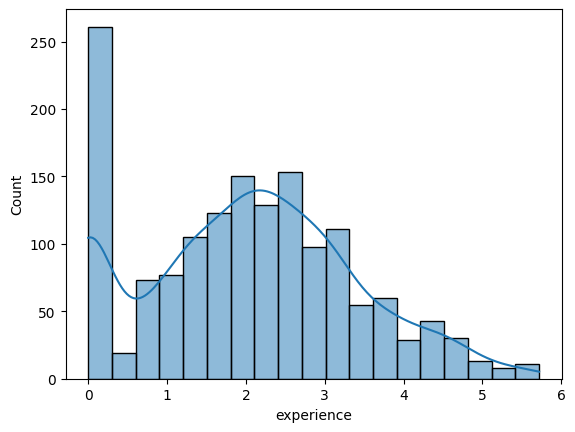

In [24]:
# Following the IQR Technique.
q3_exp = df["experience"].quantile(0.75)
q1_exp = df["experience"].quantile(0.25)
iqr_exp = q3_exp - q1_exp
upper_exp = q3_exp + (1.5*iqr_exp)
lower_exp = q1_exp - (1.5*iqr_exp)

# Replacing outliers with NAN value.
for i in df["experience"]:
  if i > upper_exp:
    df["experience"].replace(i,np.nan, inplace = True)

# As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
knn_imputer_exp = SimpleImputer(strategy='median') 
exp_reshape = np.array(df["experience"]).reshape(-1, 1)
df["experience"] = knn_imputer_exp.fit_transform(exp_reshape)
sns.histplot(df["experience"], kde = True)

#####Column : Annual Income

Skewness of Annual Income :  3.9245642452364167


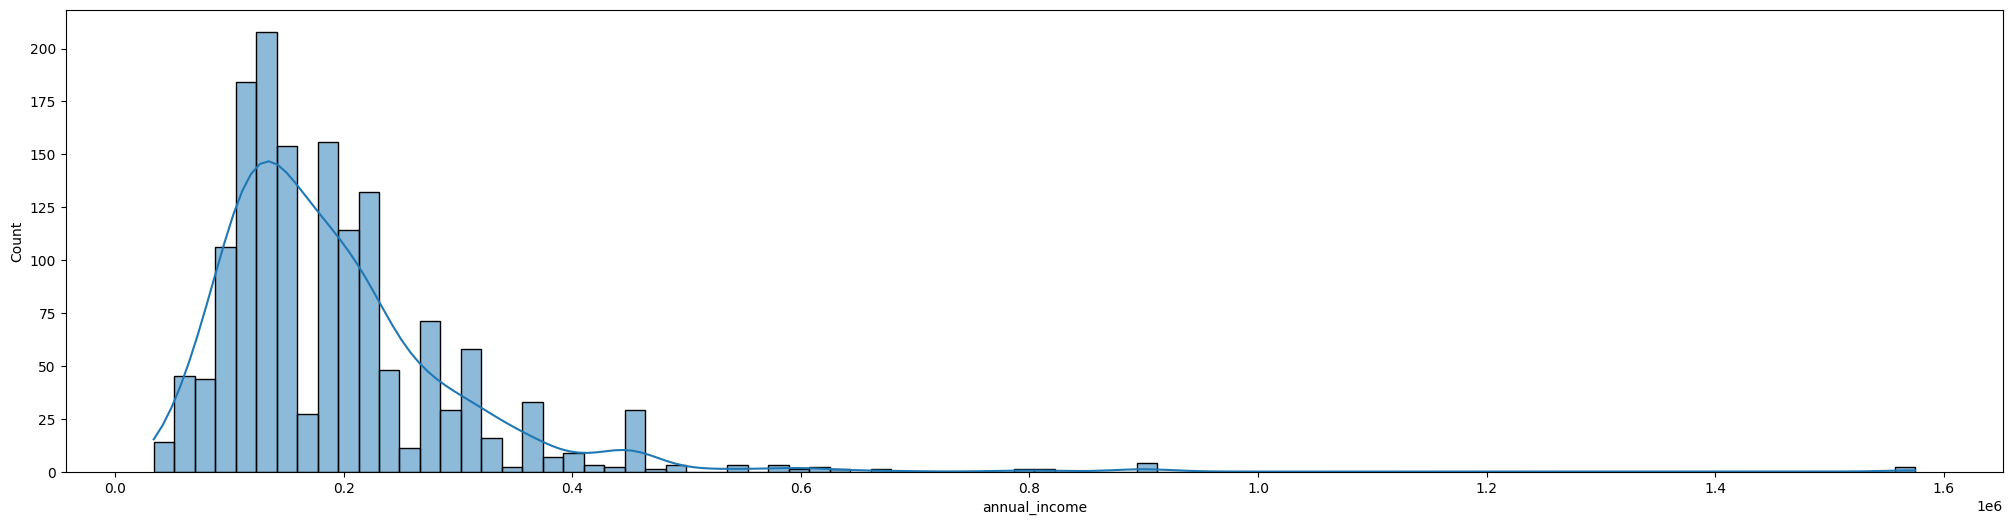

In [25]:
# Plot of annual_income.
plt.figure(figsize=(25,6))
sns.histplot(df["annual_income"], kde = True)
print("Skewness of Annual Income : ", df["annual_income"].skew())

Skewness of Log of Annual Income :  0.20152944215616836


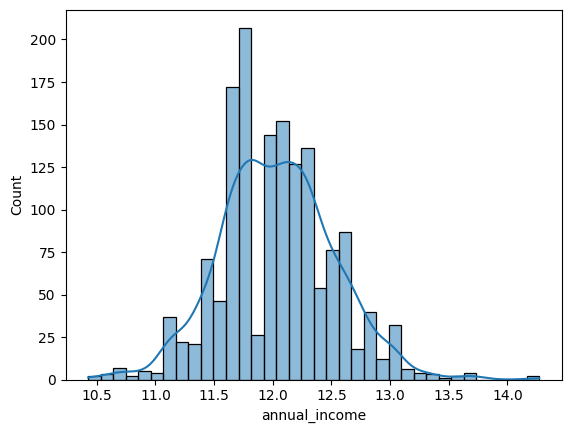

In [26]:
# Log Transformation.
sns.histplot(np.log(df["annual_income"]), kde = True)
print("Skewness of Log of Annual Income : ", np.log(df["annual_income"]).skew())
plt.show()

In [27]:
#Replacing the feature with transformed figure.
df["annual_income1"] = df['annual_income'].copy()
df["annual_income"] = np.log(df["annual_income"])

In [28]:
# Checking Null values after transformation.
print("Total Missing value after Log Transformation : ", df["annual_income"].isna().sum())

# Dropping the Null rows from the dataset.
df.drop(df[(df["annual_income"].isna())].index, inplace=True)

Total Missing value after Log Transformation :  23


There are some Null values after log transformation which affect the attribute and ML Model. So Dropping those Null rows from the dataset.

###Missing Values

In [29]:
df.isnull().sum()

ind_id               0
gender               7
car_owner            0
property_owner       0
children             0
annual_income        0
type_income          0
education            0
marital_status       0
housing_type         0
age                 22
experience           0
type_occupation    480
family_members       0
label                0
experience1          0
annual_income1       0
dtype: int64

There are Null values in gender, age and type_occupation.

#####Column : gender

In [30]:
# Counting the Female and Male counts from the dataset.
df['gender'].value_counts()

F    959
M    559
Name: gender, dtype: int64

In [31]:
# Importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# Using Mode Imputation in gender feature
mode_imputer_gender = SimpleImputer( strategy = 'most_frequent')
gender_reshape = np.array(df['gender']).reshape(-1, 1)
df['gender'] = mode_imputer_gender.fit_transform(gender_reshape)

<Axes: xlabel='gender', ylabel='Count'>

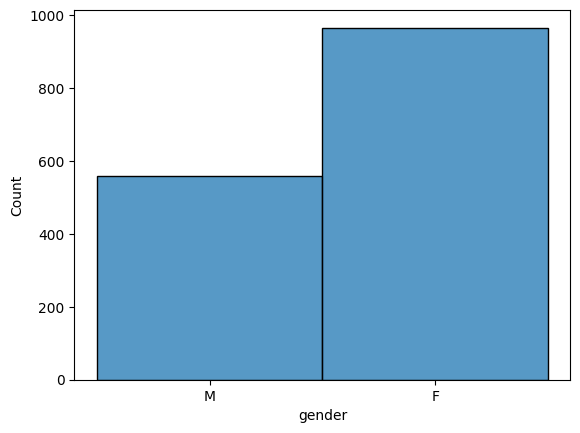

In [32]:
sns.histplot(df['gender'])

In [33]:
df['gender'].value_counts()

F    966
M    559
Name: gender, dtype: int64

There are increases of 6 values in Female.

#####Column : age

Null values in  Age feature is  22


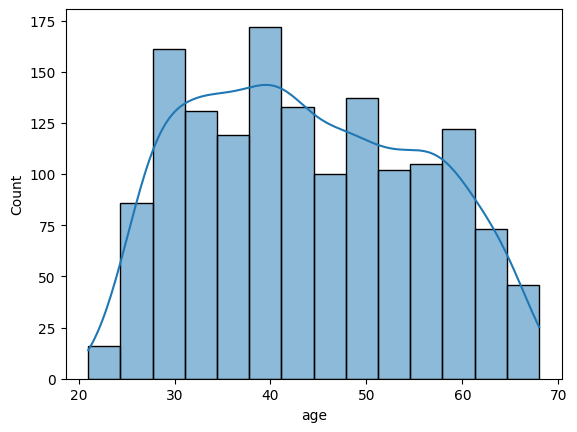

In [34]:
sns.histplot(df["age"], kde = True)
print("Null values in  Age feature is ",df["age"].isnull().sum())
plt.show()

In [35]:
# Using KNN Imputation in age feature.

from sklearn.impute import KNNImputer 
knn_imputer_age = KNNImputer(n_neighbors=5) 
income_reshape = np.array(df["age"]).reshape(-1, 1)
df["age"] = knn_imputer_age.fit_transform(income_reshape)

<Axes: xlabel='age', ylabel='Count'>

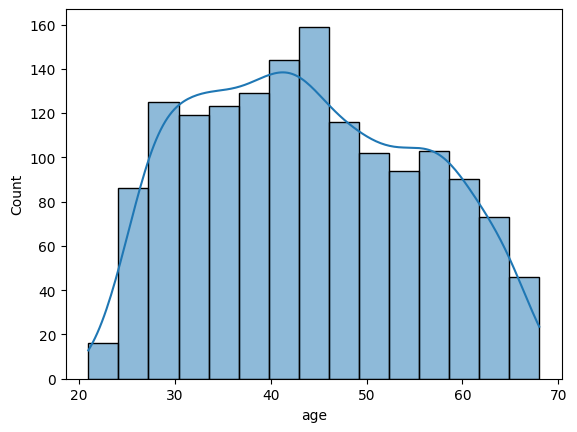

In [36]:
sns.histplot(df["age"], kde = True)

<Axes: >

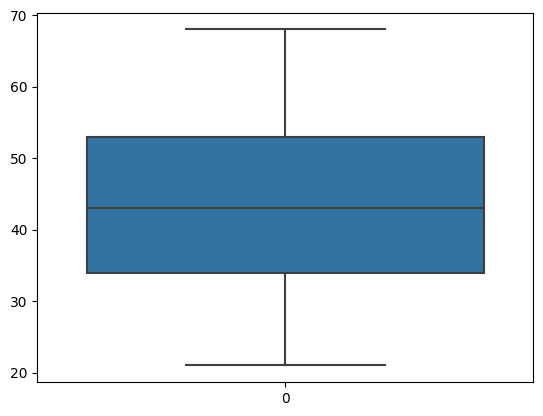

In [37]:
# Viewing Outliers in Age using Boxplot.
sns.boxplot(df["age"])

#####Column : type_occupation

In [38]:
#xtract mean and null values from Type Occupation.
print('Missing values in type of Occupation : {} %'.format(df['type_occupation'].isna().mean()*100))
print('Total missing values : ', df['type_occupation'].isna().sum())

Missing values in type of Occupation : 31.475409836065577 %
Total missing values :  480


There is 31.5% missing values in type_occupation.

In [39]:
df["type_occupation"].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

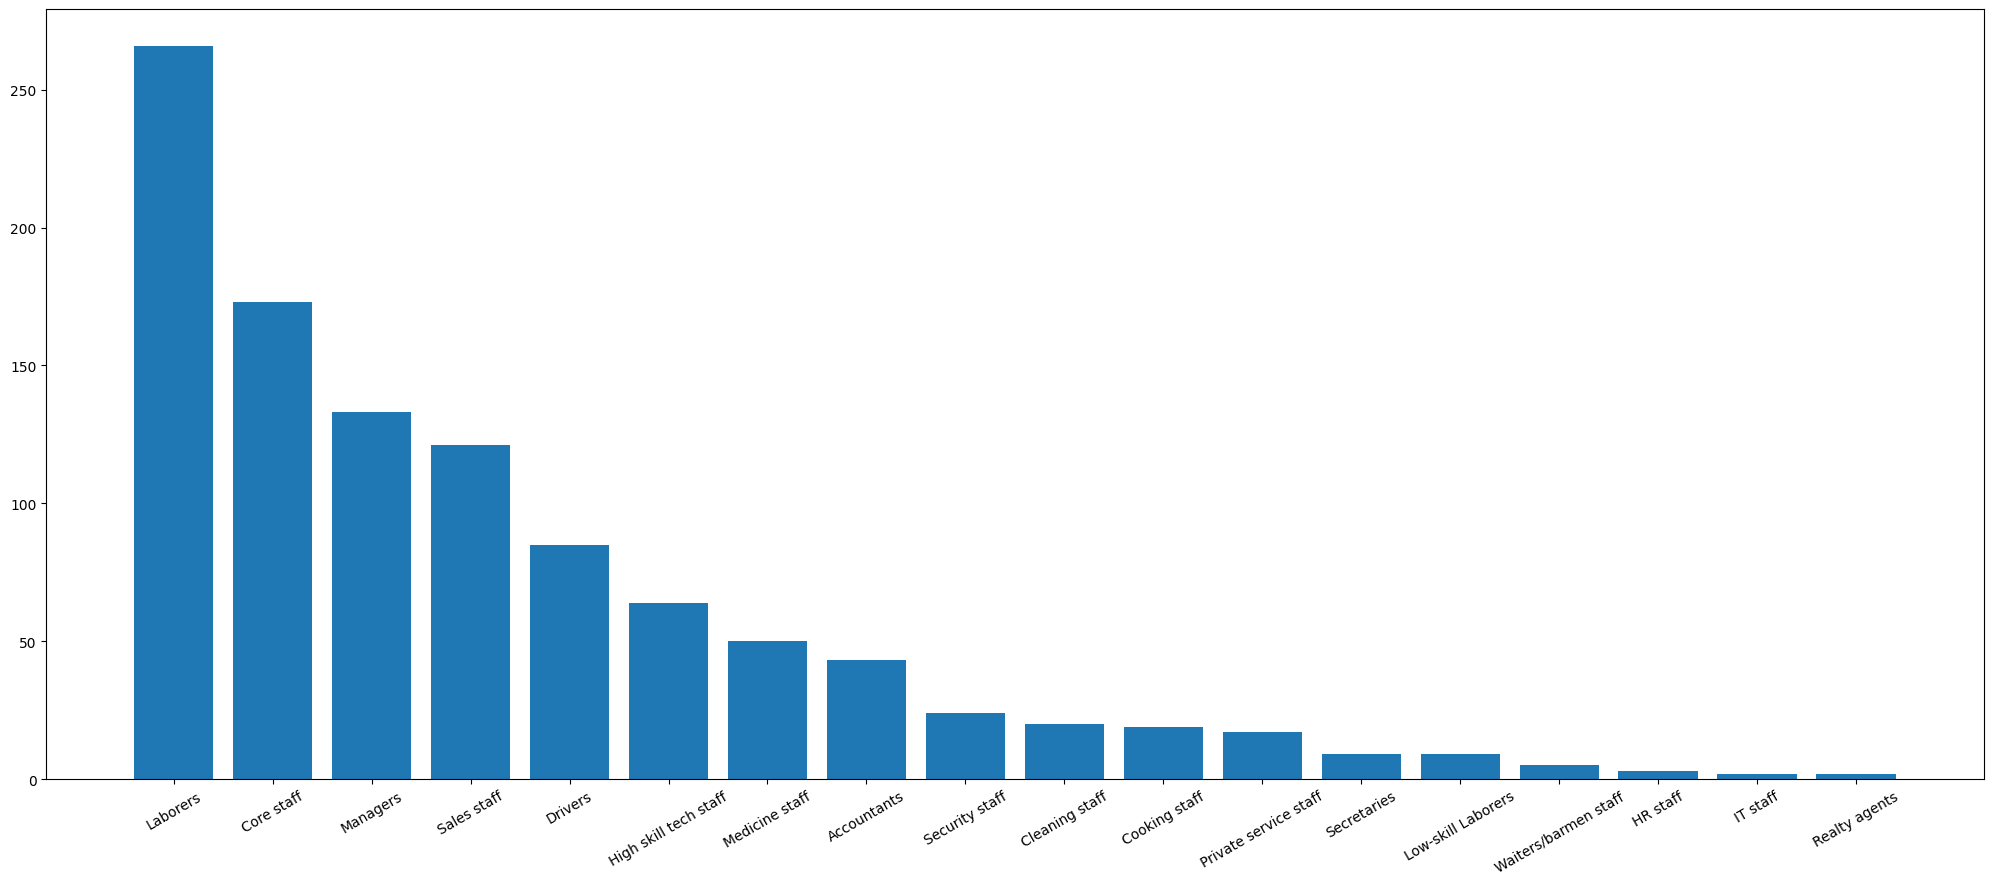

In [40]:
# Plotting Bar chart
plt.figure(figsize = (25,10))
plt.bar(df['type_occupation'].value_counts().index, df['type_occupation'].value_counts().values)
plt.xticks(rotation=30)
plt.show()

In [41]:
df.drop('type_occupation', axis = 1, inplace = True)

As there is  large no of misssing values in this features, so i am dopping this.

###Outliers

#####Column : children

In [42]:
df['children'].value_counts()

0     1073
1      302
2      132
3       16
4        1
14       1
Name: children, dtype: int64

<Axes: xlabel='children', ylabel='Count'>

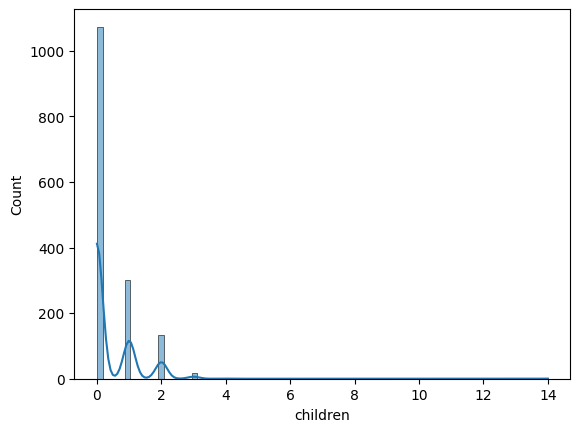

In [43]:
sns.histplot(df['children'], kde = True)

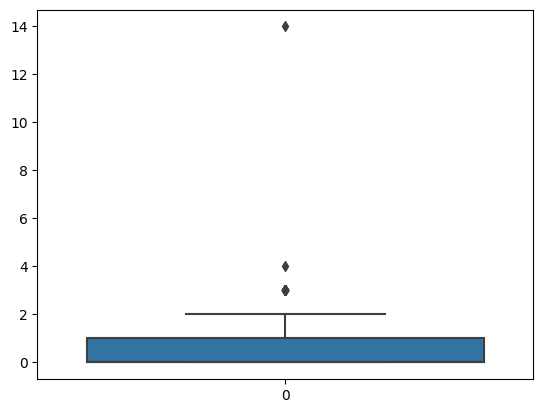

In [44]:
# Viewing Outliers in children using Boxplot.
sns.boxplot(df['children'])
plt.show()

In [45]:
# Using IQR Technigue to remove outliers.
q1_children = df['children'].quantile(0.25)
q3_children = df['children'].quantile(0.75)
iqr_children = q3_children - q1_children
lower_children = q1_children - (1.5 * iqr_children)
upper_children = q3_children + (1.5 * iqr_children)

count_children = 0
for i in df['children']:
  if i > upper_children:
    count_children+=1
print('Total rows removed :', count_children)

df.drop(df[(df['children']> upper_children)].index, inplace = True)
df.drop(df[(df['children']< lower_children)].index, inplace = True)

Total rows removed : 18


#**EXPLORATORY DATA ANALYSIS**

#####Bivariate Analysis

                            type_income
label type_income                      
0     Commercial associate          306
      Pensioner                     225
      State servant                 110
      Working                       700
1     Commercial associate           46
      Pensioner                      39
      State servant                   6
      Working                        75




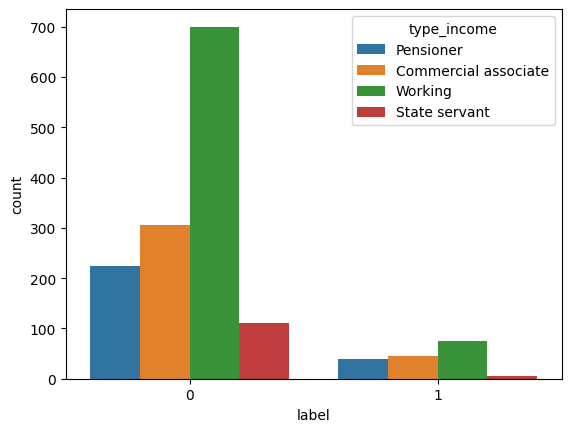

In [46]:
print(df.groupby(['label', 'type_income'])[['type_income']].count())
print('\n')
sns.countplot(x = 'label', hue = 'type_income', data = df)
plt.show()

**Explanation:-**

* x-axis represents the 'label" variable, which is the categorical variable being plotted where where 0 is application approved and 1 is application rejected.
* y-axis represents the count of observations for each "label" category.
* The hue parameter adds a third variable "type_income" to the plot, which is represented by different colored bars for each category of "type_income." 
* Therefore, the y-axis still represents the count of observations, but now the bars are grouped by "type_income" within each "label" category.
* There are 4 types of Income
    * Pensioner
    * Commerical Associate
    * Working
    * State Servant

**Observations:-**

* Ther are more chances of getting Credit Card of "Working" as Compared to Other Income type.
- In the Same Application approved Category, There are **approx. 45%** more chances to get Credit Card to House/Apartment.
- There is **approx. 90%** Credit Card application Approved and **approx. 10%** Rejected on the basis of Income type.

                           housing_type
label housing_type                     
0     Co-op apartment                 3
      House / apartment            1203
      Municipal apartment            36
      Office apartment                7
      Rented apartment               17
      With parents                   75
1     Co-op apartment                 2
      House / apartment             138
      Municipal apartment            15
      Office apartment                2
      Rented apartment                4
      With parents                    5




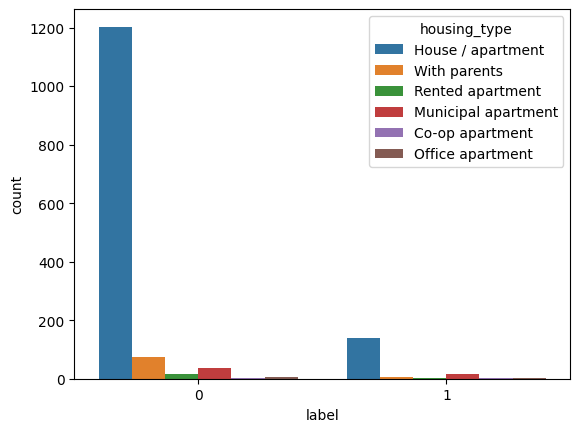

In [47]:
print(df.groupby(["label", "housing_type"])[["housing_type"]].count())
print("\n")
sns.countplot(x = "label", hue = "housing_type", data = df)
plt.show()

**Explanation:-**

* x-axis represents the "label" variable, which is the categorical variable being plotted where where 0 is application approved and 1 is application rejected.
* y-axis represents the count of observations for each "label" category.
* The hue parameter adds a third variable "housing_type" to the plot, which is represented by different colored bars for each category of "housing_type."
* Therefore, the y-axis still represents the count of observations, but now the bars are grouped by "housing_type" within each "label" category.
* There are 6 types of Housing
    * House/Apartment
    *  With Parents
    * Rented Apartment
    * Municipal Apartment
    * Co-op Apartment
    * Office Apartment

**Observations:-**

* Ther are more chances of getting Credit Card of "House / Apartment" as Compared to Other House type.
* In the Same Application approved Category, There are **approx. 80%** more chances to get Credit Card to House Apartment. Hence, we can say there is domination of Working in Housing Type.
* There is **approx. 89%** Credit Card application Approved and **approx. 11%** Rejected on the basis of Housing type.

                      annual_income1
type_income                         
Commercial associate   234915.340909
Pensioner              155619.698864
State servant          211422.413793
Working                181076.609032




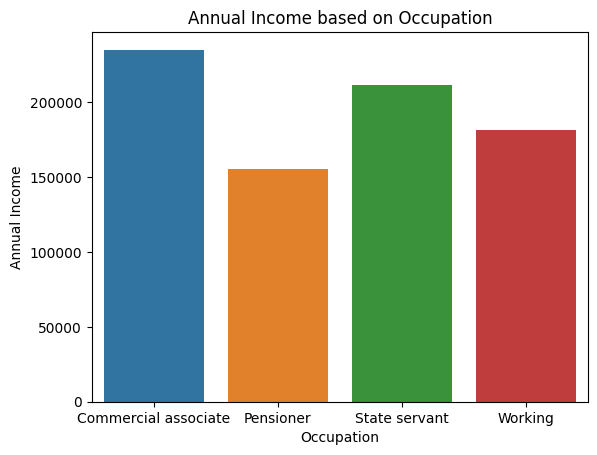

In [48]:
print(df[["type_income", "annual_income1"]].groupby(['type_income']).mean())
print("\n")

# Plotting Bar Chart
df1 = df[["type_income", "annual_income1"]].groupby(['type_income'], as_index=False).mean()
sns.barplot(x = "type_income", y = "annual_income1", data = df1)
plt.title("Annual Income based on Occupation")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.show()

**Explanation:-**

* x-axis of the first line represents the categorical variable "type_income", which is the variable we are grouping by.
*  y-axis represents the mean value of the continuous variable "annual_income1" for each category of "type_income".
* There are 4 types of Income
    * Pensioner
    * Commerical Associate
    * Working
    * State Servant

**Obseravtion :-**

* The relationship between "Annual Income" and "Type of Income" show that Commerical associate is the highest among other.

Mean of Annual Income by the Age are :
 age
(19, 25]     186300.000000
(25, 35]     205251.526718
(35, 60]     191438.328863
(60, 100]    155611.267606
Name: annual_income1, dtype: float64 



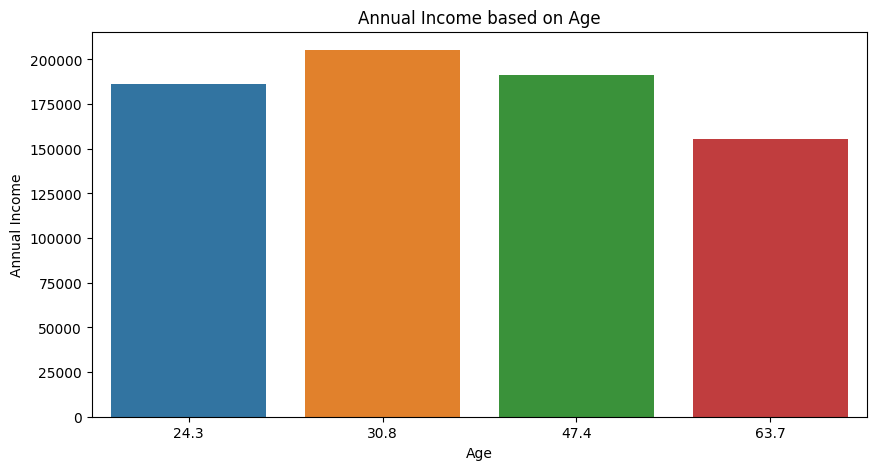

In [49]:
#Cutting the bins from 19 to 100 in 10 each part to get the  average annual income.
age = pd.cut(df["age"], bins = [19,25,35,60,100])
print("Mean of Annual Income by the Age are :\n",df.groupby(age)["annual_income1"].mean(),"\n")

#Ploting the above code in Barchart for better understanding.
df2 = round(df[['age',"annual_income1"]].groupby(pd.cut(df["age"], bins = [19,25,35,60,100]), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
sns.barplot(x = "age", y = "annual_income1", data = df2)
plt.title("Annual Income based on Age")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

**Explanation:-**

* x-axis represents the age groups of bins [19, 24], [25, 34], [35, 59], [60, 99].
*  y-axis represents the mean annual income for each age group.

**Observations:-**

* The relationship between "Annual Income" and "Age" ranging from **1.5LPA** to **2.0LPA**.

#####Multivariate Analysis

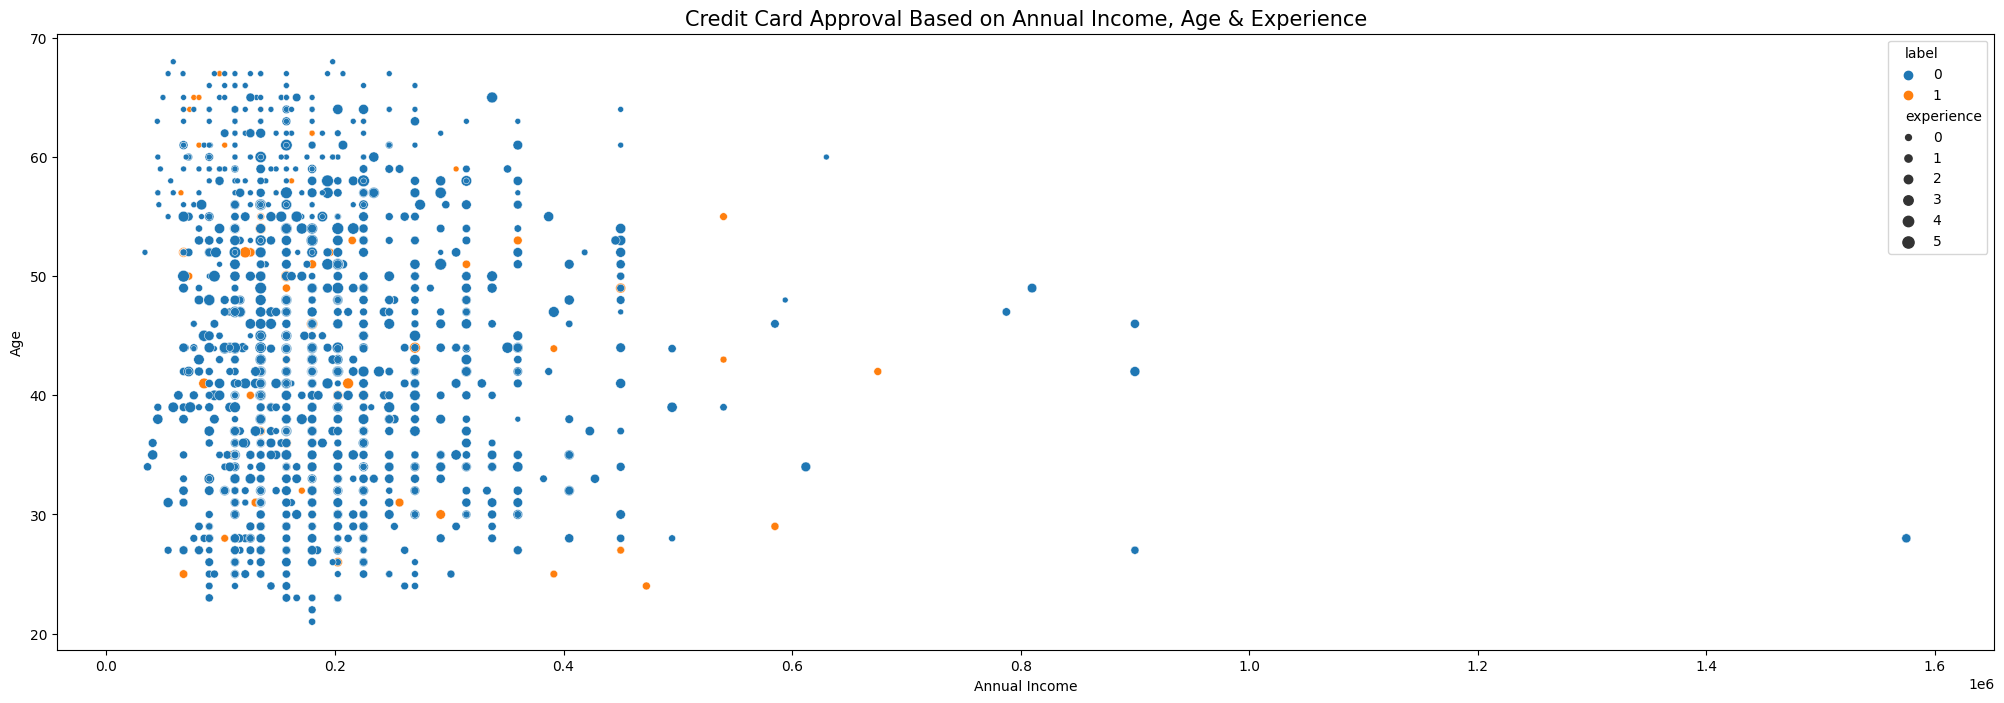

In [50]:
plt.figure(figsize = (25,8))

#Plotting "age" and "annual Income" plot on the basis of label and Experience.
sns.scatterplot(x = df['annual_income1'],y = df["age"], hue = df["label"], size = df["experience"])
plt.title("Credit Card Approval Based on Annual Income, Age & Experience", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("Age")
plt.show()

**Explanation:-**
* x-axis represents the annual income of individuals.
* y-axis represents the age of individuals. 
* Hue represents the third variable, which is "label".

**Observations:-** 

* Experience is divided into 0-8, 8-16, 16-24, 24-32, 32-40 years with the label encoded 0(Approved) or 1(Rejected).
* There is high probabity to get the Credit Card Approval in the Age group 22 to 60 years.
* Annual Income ranging from 1LPA to (2-2.5)LPA also shows high chances to get the Credit Card Approval.
* Those people who have **4 to 16 years of Experience** and **Age 30-55 years** and **Annual Income ranging from 1.5 to 2 LPA** has High probabity to get the Credit Card Approval.

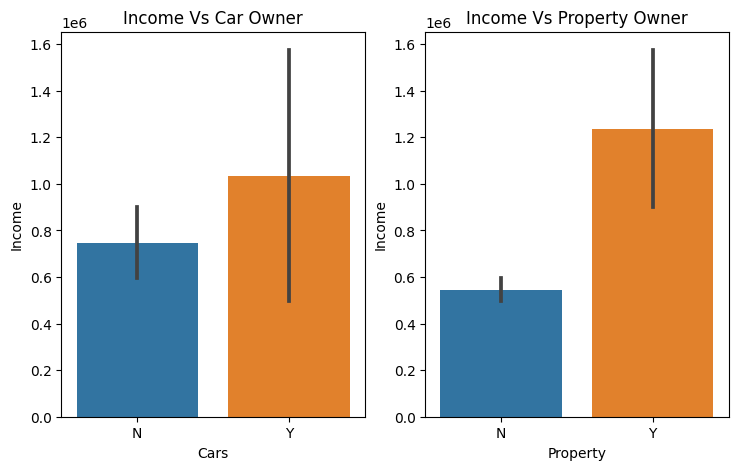

In [51]:
df3 = df[["car_owner","property_owner", "annual_income1"]].groupby(['car_owner','property_owner'], as_index=False).agg({'annual_income1':'count','annual_income1':'max'})

plt.figure(figsize = (18,5))
plt.subplot(1, 4, 1)
sns.barplot(x= "car_owner", y = "annual_income1", data = df3)
plt.title("Income Vs Car Owner")
plt.xlabel("Cars")
plt.ylabel("Income")

plt.subplot(1, 4, 2)
sns.barplot(x = "property_owner", y = "annual_income1", data = df3)
plt.title("Income Vs Property Owner")
plt.xlabel("Property")
plt.ylabel("Income")
plt.show()

**Explanation:-**
* For the first plot:
  * x-axis: car owner status (whether the person owns a car or not).
  * y-axis: maximum annual income among individuals with that car owner status.

* For the second plot:
  * x-axis: property owner status (whether the person owns a property or not).
  * y-axis: maximum annual income among individuals with that property owner status.

**Observations:-**
* Income between 0.8LPA to 1LPA have Car.
* Income between 0.6LPA to 1.2LPA have Property.

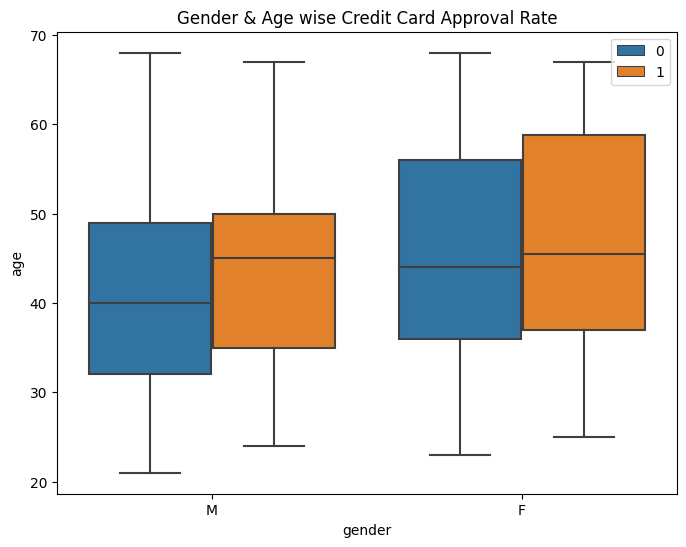

              gender
label gender        
0     F          861
      M          480
1     F           94
      M           72


In [52]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "gender", y = "age", data = df, hue = "label")
plt.title("Gender & Age wise Credit Card Approval Rate")
plt.xlabel("gender")
plt.ylabel("age")
plt.legend(loc = "upper right")
plt.show()

print(df.groupby(["label", "gender"])[["gender"]].count())

**Explanation:-**

* x axis represents the gender categories.
* y axis represents the age.
* Hue represents the third variable, which is "label".


**Observations:-**

* Male has **35.79%** chances and Female with **64.2%** chances to get the Credit Card Approval.
* From all dataset, Female has **57.13%** chances and Male has **32.85%** chances to get Credit Card Approval.

#**FEATURE SCALING**

In [53]:
df.head()

,ind_id,gender,car_owner,property_owner,children,annual_income,type_income,education,marital_status,housing_type,age,experience,family_members,label,experience1,annual_income1
0,5008827,M,Y,Y,0,12.100712,Pensioner,Higher education,Married,House / apartment,51.00000,0.000000,2,1,0.0,180000.0
1,5009744,F,Y,N,0,12.660328,Commercial associate,Higher education,Married,House / apartment,37.00000,1.264911,2,1,1.6,315000.0
2,5009746,F,Y,N,0,12.660328,Commercial associate,Higher education,Married,House / apartment,43.92149,1.264911,2,1,1.6,315000.0
4,5009752,F,Y,N,0,12.660328,Commercial associate,Higher education,Married,House / apartment,37.00000,1.264911,2,1,1.6,315000.0
5,5009753,F,Y,N,0,12.660328,Pensioner,Higher education,Married,House / apartment,37.00000,1.264911,2,1,1.6,315000.0


####Feature Selection

In [54]:
#"Corr" use to get the relationship between all numerical variables.
df.corr()

,ind_id,children,annual_income,age,experience,family_members,label,experience1,annual_income1
ind_id,1.000000,0.034111,0.010696,-0.021196,0.024035,0.013259,0.019160,0.003828,0.033354
children,0.034111,1.000000,0.077182,-0.324860,0.158094,0.861058,-0.017703,0.072266,0.097653
annual_income,0.010696,0.077182,1.000000,-0.129941,0.154572,0.051906,0.020485,0.087537,0.897130
age,-0.021196,-0.324860,-0.129941,1.000000,-0.252684,-0.289038,0.037078,-0.020329,-0.111962
experience,0.024035,0.158094,0.154572,-0.252684,1.000000,0.183507,-0.087980,0.884023,0.108323
family_members,0.013259,0.861058,0.051906,-0.289038,0.183507,1.000000,-0.026954,0.089362,0.059665
label,0.019160,-0.017703,0.020485,0.037078,-0.087980,-0.026954,1.000000,-0.095278,0.027429
experience1,0.003828,0.072266,0.087537,-0.020329,0.884023,0.089362,-0.095278,1.000000,0.051116
annual_income1,0.033354,0.097653,0.897130,-0.111962,0.108323,0.059665,0.027429,0.051116,1.000000


In [55]:
#Droping soem columns which as least chances or no chances to increase accuracy of ML model.
df.drop(["ind_id", "marital_status", "experience1", "annual_income1"], axis=1, inplace =True)

In [56]:
#Dividing into Independent and Dependent Variable.
X = df.drop(["label"], axis=1)
y = df["label"]

In [57]:
#To the dummy columns from all unique values in each columns.
X1 = pd.get_dummies(X)

In [58]:
#Importing ExtratreeRegressor from sklearn
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X1,y)

ExtraTreesRegressor()

In [59]:
# Getting all the feature importances with target variable.
print(model.feature_importances_)

[4.30431723e-02 2.06578070e-01 1.95544263e-01 1.53797787e-01
 7.76384839e-02 2.23023078e-02 2.58514038e-02 2.69147477e-02
 2.82908420e-02 2.62181355e-02 2.56770601e-02 1.76599353e-02
 2.00809833e-02 1.05375519e-02 1.53811755e-02 4.20272893e-05
 2.23336702e-02 7.17610844e-03 8.01561112e-03 2.53251981e-02
 6.24084982e-03 6.08183195e-03 1.26094538e-02 7.53135536e-03
 4.73374291e-03 4.39423162e-03]


The feature importance score is a metric that indicates how much a given feature contributes to the overall performance of the model. The higher the score, the more important the feature is in predicting the target variable.

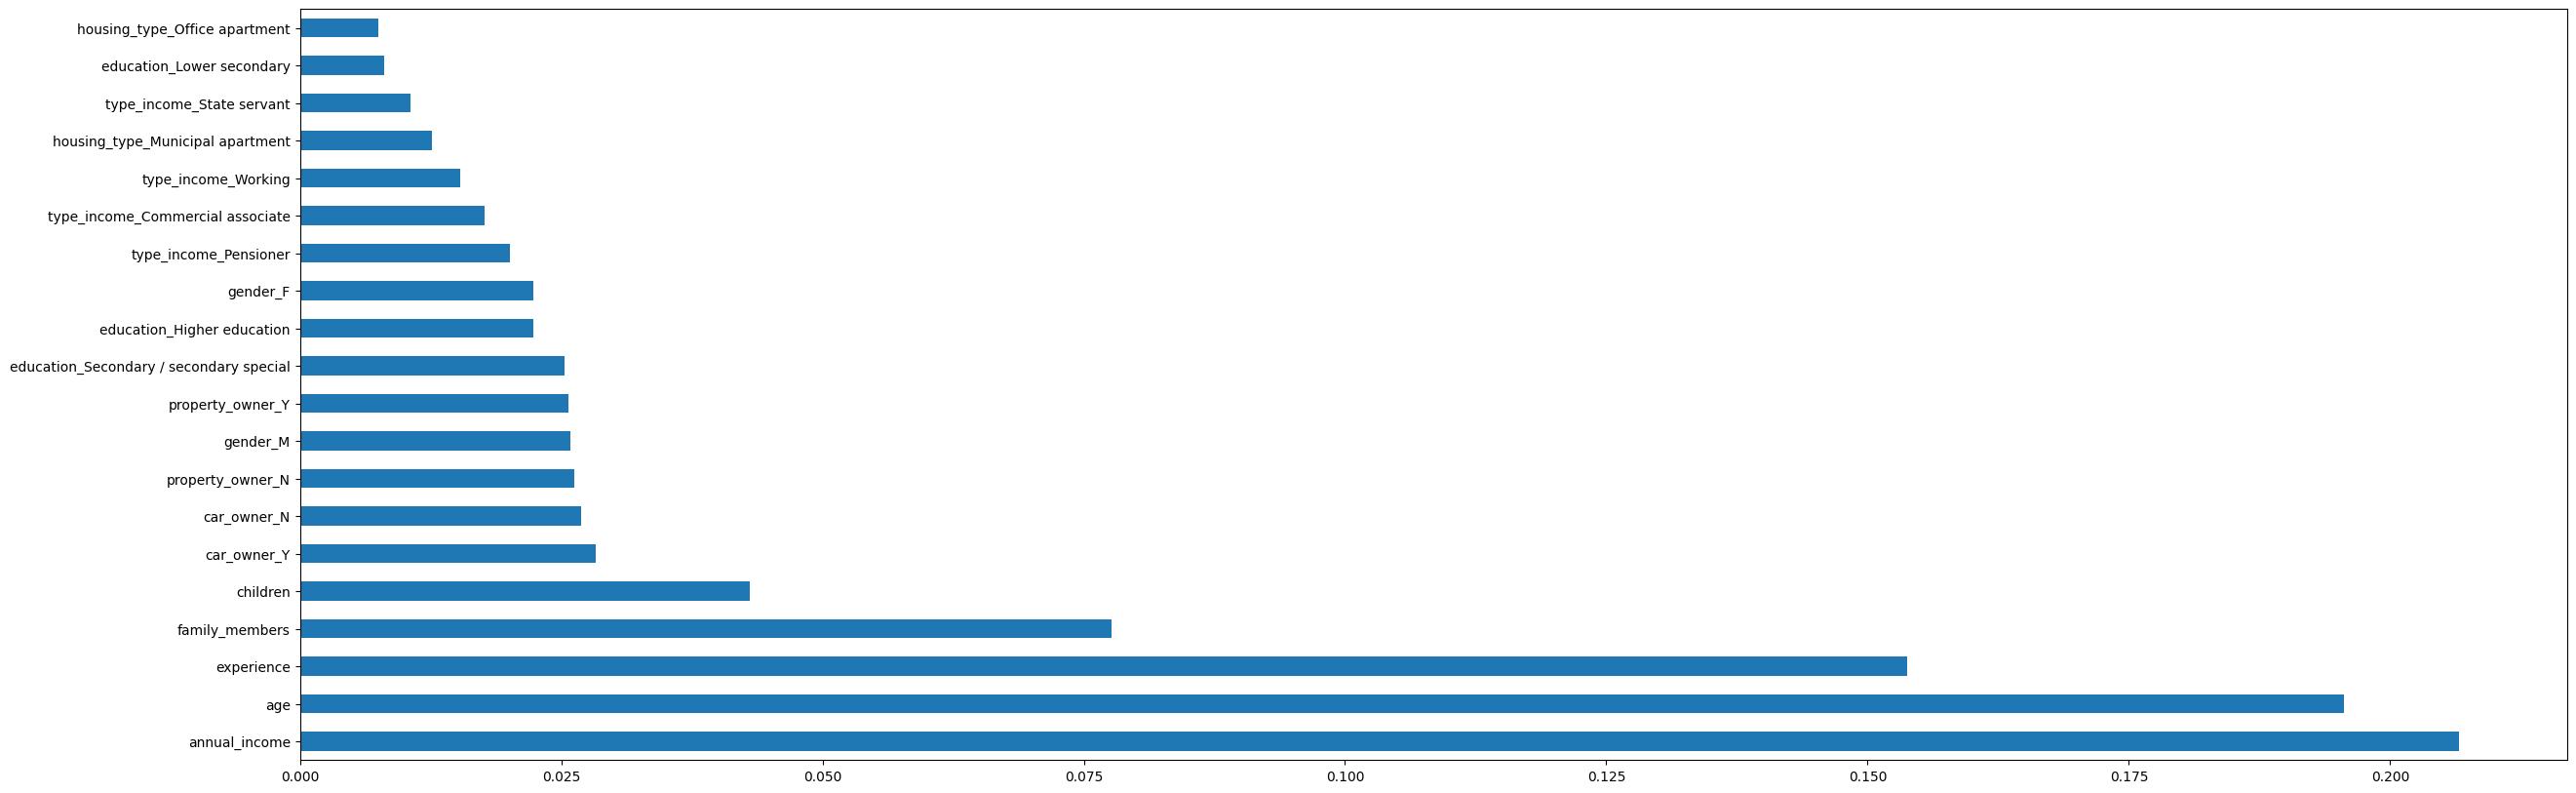

In [60]:
#plotting all the important columns which are related to target variable.
feat_important = pd.Series(model.feature_importances_, index = X1.columns)
plt.figure(figsize= (30,10))
#Plotting TOP-20 Columns from the Dummy variable "X1".
feat_important.nlargest(20).plot(kind="barh")
plt.show()

**OBSERVATION**
* TOP-20 column are correlated to target variable.
* Top 5 are list below:- 
  * Age
  * Annual Income
  * Experience
  * Family Members 
  * Children

####Splitting Data

In [61]:
#Splitting into training and test dataset with 75% and 25% on random state=0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [62]:
#Getting the shape of training and test dataset.
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (1130, 11) (1130,)
Test :  (377, 11) (377,)


In [63]:
X_train.head()

,gender,car_owner,property_owner,children,annual_income,type_income,education,housing_type,age,experience,family_members
1433,F,N,N,0,12.100712,Commercial associate,Secondary / secondary special,House / apartment,31.0,2.549510,1
735,F,N,N,2,11.779129,Working,Secondary / secondary special,House / apartment,42.0,3.082207,4
258,F,Y,N,0,11.707670,Pensioner,Secondary / secondary special,House / apartment,64.0,0.000000,1
690,M,Y,Y,0,11.407565,Pensioner,Secondary / secondary special,House / apartment,50.0,0.000000,2
1231,F,N,N,0,11.630709,Working,Secondary / secondary special,House / apartment,34.0,0.707107,1


####Categorical Encoding

In [64]:
  # Importing ColumnTransformer, OneHotEncoder & OrdinalEncoder.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


transformer = ColumnTransformer(transformers = [
        ("cat1", OneHotEncoder(sparse = False, drop = "first"), [0,1,2,5,7]),
        ("cat2", OrdinalEncoder(categories=[["Incomplete higher", "Lower secondary", "Secondary / secondary special", 
                                             "Academic degree", "Higher education"]]), [6])
                ], remainder= "passthrough")



#Using fit_transform to the train data.
X_train = transformer.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = transformer.transform(X_test)

####SMOTE Technique (Synthetic Minority Over Sampling)

SMOTE can effectively increase the size of the minority class without duplicating existing samples, which can help improve the model's performance by reducing the bias towards the majority class.

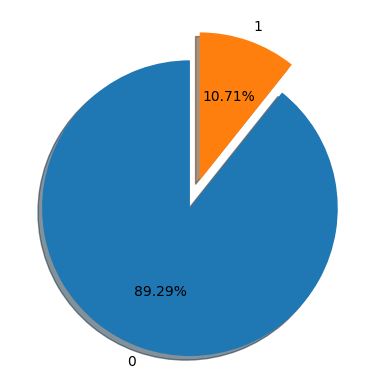

In [65]:
#Using Pie Chart, Plotting the Label feature without SMOTE technique.
plt.pie(y_train.value_counts(), labels = y_train.unique(), startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.2f%%')
plt.show()

In [66]:
#Importing the SMOTE from the imblearn.
from imblearn.over_sampling import SMOTE

#Defining the smote for SMOTE with neighbour 5 and random state 130.
smote = SMOTE(random_state = 130, k_neighbors = 5)

# Fitting and resampling training data values
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

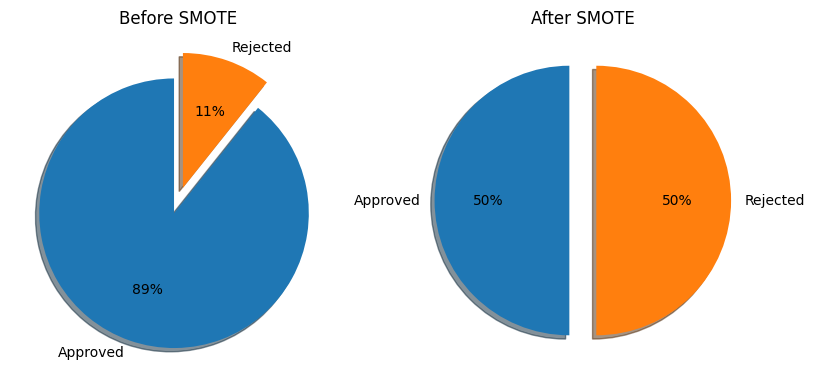

In [67]:
#Plotting the Before SMOTE and After SMOTE pie chart.
plt.figure(figsize=(20,15))
plt.subplot(1,4,1)
plt.pie(y_train.value_counts(), labels = ["Approved", "Rejected"], startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.0f%%')
plt.title("Before SMOTE")

plt.subplot(1,4,2)
plt.pie(y_train_sm.value_counts(), labels = ["Approved", "Rejected"], startangle = 90, shadow = True, explode=(0.1, 0.1), autopct = '%1.0f%%')
plt.title("After SMOTE")
plt.show()

**OBSERVATION:-**
* Before Approval rate was 89% and Rejection rate was 11%.
* After SMOTE technique, Both are Equal.

####Standardization

In [68]:
#Importing Standardization from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Using fit_transform to the train data.
X_train = scaler.fit_transform(X_train)
X_train_sm = scaler.fit_transform(X_train_sm)

#"transform" only to avoid data leakage.
X_test = scaler.transform(X_test)

#**MODEL SELECTION**

##**LOGISTIC REGRESSION**

#####Baseline Logistic Regression

In [69]:
# Importing Logistic Regression from sklearn.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fitting the training independent and dependent variable to get trained.
log_reg.fit(X_train,y_train)

# Predicting the result foe the test dataset "X_test".
y_pred_log = log_reg.predict(X_test)

In [70]:
# Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Calculating the accuracy for the predicted and actual dataset.
Log_reg_untune = accuracy_score(y_pred_log, y_test)*100
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred_log, y_test)*100)))

Accuracy of Logistic Regression Model : 88%


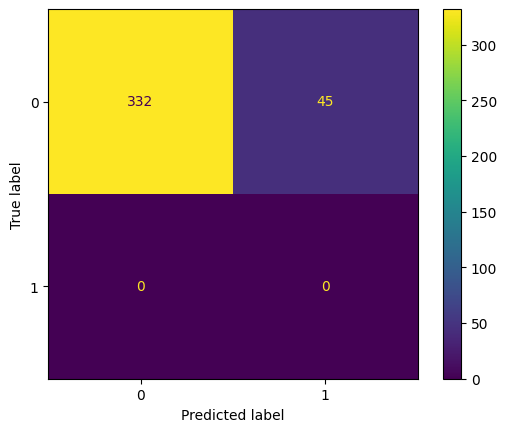

In [71]:
# Calculating for the confusion matrix.
cm_log = confusion_matrix(y_pred_log, y_test, labels= log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp.plot()
plt.show()

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "332" people get approval of credit card.
  * TN - "0" people not get approval of credit card.
  * FP - "45" people not get approval of credit card but model predicted they will get.
  * FN - "0" people get approval of credit card  but model predicted they will not get.

In [72]:
# Getting the Classification report for precision, recall & f1-score value.
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_log, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       377
           1       0.00      0.00      0.00         0

    accuracy                           0.88       377
   macro avg       0.50      0.44      0.47       377
weighted avg       1.00      0.88      0.94       377



<Axes: xlabel='label', ylabel='Density'>

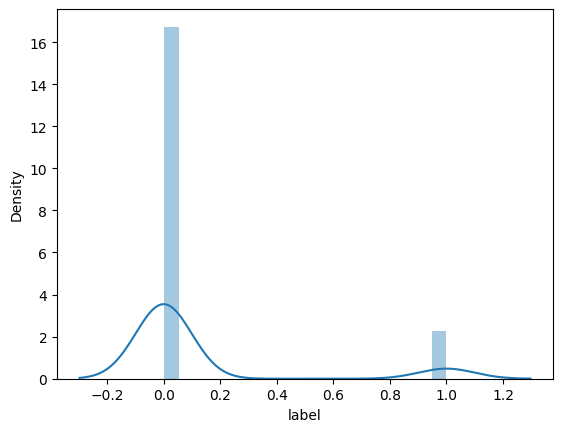

In [73]:
#Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_log)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are some noise(error) at 1(value).

#####SMOTE Logistic Regresion

In [74]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_sm, y_train_sm)

# Predicting the result for the test dataset "X_test".
log_reg_smotee = log_reg_smote.predict(X_test)

print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(log_reg_smotee, y_test)*100)))
lg_smote_score = accuracy_score(log_reg_smotee, y_test)*100

# Calculating for the confusion matrix.
confusion_matrix(log_reg_smotee, y_test)

Accuracy of Logistic Regression Model : 59%


array([[196,  20],
       [136,  25]])

 **OBSERVATION** :-
  * SMOTE doesn't help in model improvement as Type-1 and Type-2 error are high.

#####Hyperparameter Tuning for Logistic Regression

In [75]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":["l1", "l2", "elasticnet"],
             "C" : [1,2,3,4,5,6,10,20,40,50],
             "max_iter" : [100,200,300,400,500]}
Classfier_Reg = GridSearchCV(log_reg,param_grid=parameter, scoring="accuracy", cv=10)

In [76]:
# Fitting the training independent and dependent variable to get trained.
Classfier_Reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [77]:
# Getting the best parameter from gridsearchcv
print(Classfier_Reg.best_params_)

# Getting the best score for training the model.
print(Classfier_Reg.best_score_)

# Predicting the result foe the test dataset "X_test".
y_pred__log_tune = Classfier_Reg.predict(X_test)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.8929203539823009


In [78]:
# Calculating the accuracy for the predicted and actual dataset.
Log_reg_tune = accuracy_score(y_pred__log_tune, y_test)*100
round(accuracy_score(y_pred__log_tune, y_test)*100)

88

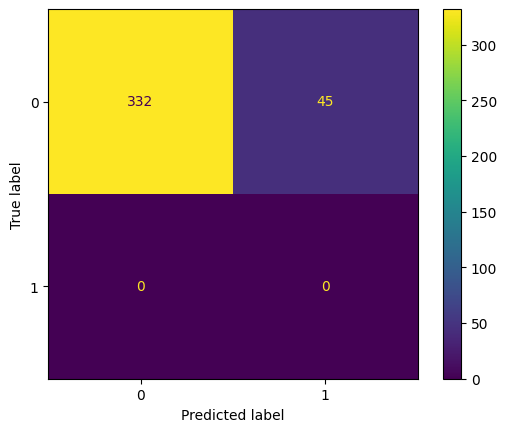

In [79]:
# Calculating for the confusion matrix.
cm_log_tune = confusion_matrix(y_pred__log_tune, y_test, labels= Classfier_Reg.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_log_tune, display_labels=Classfier_Reg.classes_)
disp1.plot()
plt.show()

In [80]:
# Getting the Classification report for precision, recall & f1-score value.
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred__log_tune, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       377
           1       0.00      0.00      0.00         0

    accuracy                           0.88       377
   macro avg       0.50      0.44      0.47       377
weighted avg       1.00      0.88      0.94       377



**OBSERVATION** 
* After tuning, 
  * accuracy, precision, recall & F1-Score remain same.
  * Type 1 is high.

##**DECISION TREE CLASSIFIER**

#####Baseline Decision Tree

In [81]:
# Importing DecisionTreeClassifier from sklearn.
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# Fitting the training independent and dependent variable to get trained.
dec_tree.fit(X_train,y_train)

# Predicting the result foe the test dataset "X_test".
y_pred_dec = dec_tree.predict(X_test)

In [82]:
# Calculating the accuracy for the predicted and actual dataset.
dec_tree_untune = accuracy_score(y_pred_dec, y_test)*100
accuracy_score(y_pred_dec, y_test)*100

85.14588859416446

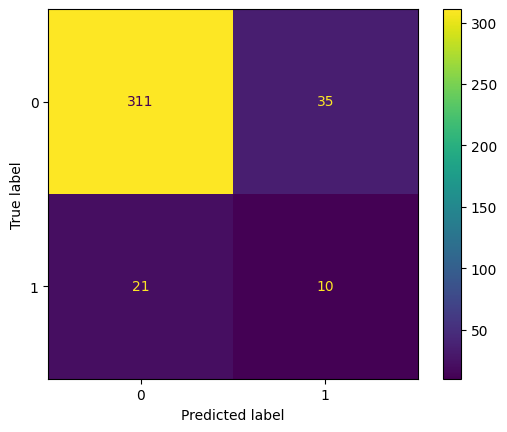

In [83]:
# Calculating for the confusion matrix.
dt = confusion_matrix(y_pred_dec, y_test, labels= dec_tree.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=dt, display_labels=dec_tree.classes_)
disp2.plot()
plt.show()

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "310" people get approval of credit card.
  * TN - "10" people not get approval of credit card.
  * FP - "35" people not get approval of credit card but model predicted they will get.
  * FN - "22" people get approval of credit card  but model predicted they will not get.

In [84]:
# Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_dec, y_test))

Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       346
           1       0.22      0.32      0.26        31

    accuracy                           0.85       377
   macro avg       0.58      0.61      0.59       377
weighted avg       0.88      0.85      0.86       377



<Axes: xlabel='label', ylabel='Density'>

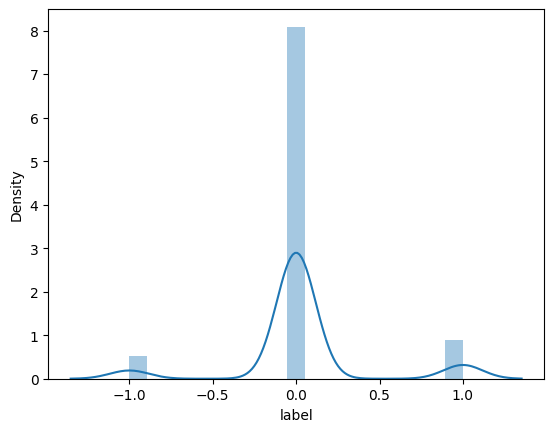

In [85]:
# Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_dec)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1 & -1(value).

#####SMOTE Decision Tree

In [86]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_sm, y_train_sm)

# Predicting the result for the test dataset "X_test".
dt_smotee = dt_smote.predict(X_test)

print("Accuracy of Decision Tree Model : {}%".format(round(accuracy_score(dt_smotee, y_test)*100)))
dt_smote_score = accuracy_score(dt_smotee, y_test)*100
# Calculating for the confusion matrix.
confusion_matrix(dt_smotee, y_test)

Accuracy of Decision Tree Model : 87%


array([[300,  18],
       [ 32,  27]])

**OBSERAVTION** :-
* Type 1 and Type 2 erro is less.
* Accuracy Improved by 3%.

#####Hyper Parameter Tuning for Decision Tree Classifier

In [87]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV
parameter_dtc = {"criterion" : ["gini", "entropy", "log_loss"],
                 "splitter" : ["best", "random"],
                 "max_depth" : [1,2,3,4,5],
                 "max_features" : ["auto", "sqrt", "log2"],
                 "ccp_alpha" : [1,2,3,4,5,6,7]}
Classfier_dtc = GridSearchCV(dec_tree,param_grid=parameter_dtc, scoring="accuracy", cv=10)

* Criterion for impurity of feature will be selected based on - "gini", "entropy" or "log loss"
* Splitter use for best split after every feature selected Information Gain.
* Max_depth use for how much depth we want to go in dividing the feature for purity.
* min_samples_split use for the minimum number of samples for each split.
* min_samples_leaf use for the minimum number of samples for each node.
* max_feature is the number of features to consider when looking for the best split.
* max_leaf_nodes use to control how much leaf nodes we required.,
* ccp_alpha - Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be choosen.

In [88]:
# Fitting the training independent and dependent variable to get trained.
Classfier_dtc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [89]:
# Getting the best parameter from gridsearchcv
print(Classfier_dtc.best_params_)

# Getting the best score for training the model.
print(Classfier_dtc.best_score_)

# Predicting the result foe the test dataset "X_test".
y_pred_tune_dtc = Classfier_dtc.predict(X_test)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}
0.8929203539823009


In [90]:
# Calculating the accuracy for the predicted and actual dataset.
dec_tree_tune = accuracy_score(y_pred_tune_dtc, y_test)*100
accuracy_score(y_pred_tune_dtc, y_test)*100

88.06366047745358

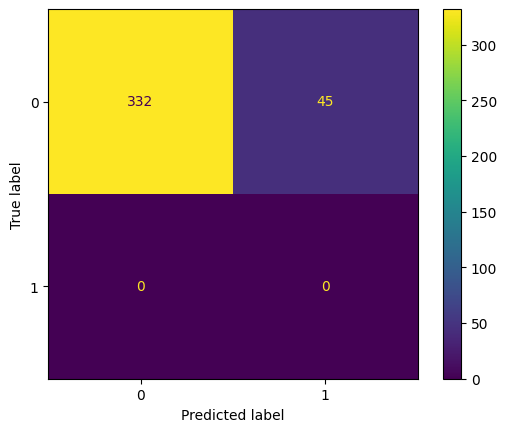

In [91]:
# Calculating for the confusion matrix.
dt_tune = confusion_matrix(y_pred_tune_dtc, y_test, labels= Classfier_dtc.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=dt_tune, display_labels=Classfier_dtc.classes_)
disp3.plot()
plt.show()

In [92]:
# Getting the Classification report for precision, recall & f1-score value.
print(classification_report(y_pred_tune_dtc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       377
           1       0.00      0.00      0.00         0

    accuracy                           0.88       377
   macro avg       0.50      0.44      0.47       377
weighted avg       1.00      0.88      0.94       377



**OBSERVATION** :-
* Accuracy Improved by 4% from the baseline model and 1% by SMOTE Model.
* Type 1 Error increased and Type 2 Error decreased.

##**KNN**

#####Baseline KNN

In [93]:
# Importing KNeighborsClassifier from sklearn.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Fitting the training independent and dependent variable to get trained.
knn.fit(X_train,y_train)

# Predicting the result foe the test dataset "X_test".
y_pred_knn = knn.predict(X_test)

In [94]:
# Calculating the accuracy for the predicted and actual dataset.
knn_untune = accuracy_score(y_pred_knn, y_test)*100
accuracy_score(y_pred_knn, y_test)*100

85.6763925729443

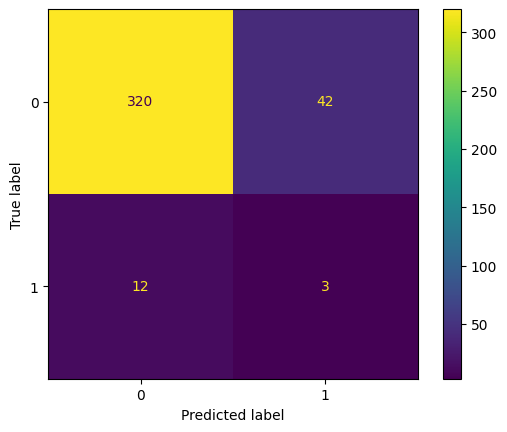

In [95]:
# Calculating for the confusion matrix.
knn_cm = confusion_matrix(y_pred_knn, y_test, labels= knn.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp4.plot()
plt.show()

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "320" people get approval of credit card.
  * TN - "3" people not get approval of credit card.
  * FP - "42" people not get approval of credit card but model predicted they will get.
  * FN - "12" people get approval of credit card  but model predicted they will not get.

In [96]:
# Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of KNN Model : \n",classification_report(y_pred_knn, y_test))

Classification Report of KNN Model : 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       362
           1       0.07      0.20      0.10        15

    accuracy                           0.86       377
   macro avg       0.52      0.54      0.51       377
weighted avg       0.93      0.86      0.89       377



<Axes: xlabel='label', ylabel='Density'>

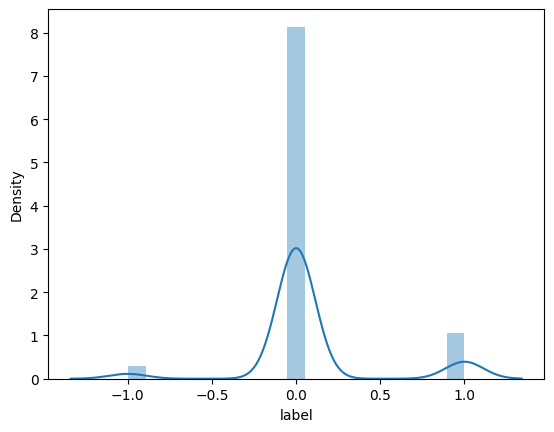

In [97]:
# Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_knn)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1(value).

#####SMOTE KNN

In [98]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_sm, y_train_sm)

# Predicting the result foe the test dataset "X_test".
knn_smotee = knn_smote.predict(X_test)

print("Accuracy of Decision Tree Model : {}%".format(round(accuracy_score(knn_smotee, y_test)*100)))
knn_smote_score = accuracy_score(knn_smotee, y_test)*100

# Calculating for the confusion matrix.
confusion_matrix(knn_smotee, y_test)

Accuracy of Decision Tree Model : 78%


array([[267,  19],
       [ 65,  26]])

**OBSERVATION** :-
* SMOTE Technique doesn't help in KNN.
  * Error Increased and accuracy moved down.

#####Hyper Parameter Tuning for KNN

In [99]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV
parameter_knn = {"n_neighbors" : list(np.arange(1,30,1)),
                 "weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
Classfier_knn = GridSearchCV(knn,param_grid=parameter_knn, scoring="accuracy", cv=10)

In [100]:
# Fitting the training independent and dependent variable to get trained.
Classfier_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [101]:
# Getting the best parameter from gridsearchcv.
print(Classfier_knn.best_params_)

# Getting the best score for training the model.
print(Classfier_knn.best_score_)

# Predicting the result foe the test dataset "X_test".
y_pred_tune_knn = Classfier_knn.predict(X_test)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}
0.9185840707964601


In [102]:
# Calculating the accuracy for the predicted and actual dataset.
knn_tune = accuracy_score(y_pred_tune_knn, y_test)*100
accuracy_score(y_pred_tune_knn, y_test)*100

88.06366047745358

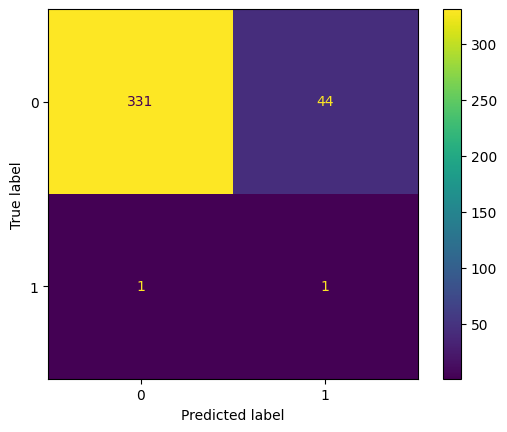

In [103]:
# Calculating for the confusion matrix.
knn_tune_cm = confusion_matrix(y_pred_tune_knn, y_test, labels= Classfier_knn.classes_)
disp5 = ConfusionMatrixDisplay(confusion_matrix=knn_tune_cm, display_labels=Classfier_knn.classes_)
disp5.plot()
plt.show()

**OBSERVATION** :-
* Type 1 Error Increased by 2 value and Type 2 Error Reduced by 11 values.
* Improved accuracy by 2%.

In [104]:
# Getting the Classification report for precision, recall & f1-score value.
print(classification_report(y_pred_tune_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       375
           1       0.02      0.50      0.04         2

    accuracy                           0.88       377
   macro avg       0.51      0.69      0.49       377
weighted avg       0.99      0.88      0.93       377



##**RANDOM FOREST CLASSFIER**

#####Baseline Random Forest

In [105]:
# Importing RandomForestClassifier from sklearn.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

# Fitting the training independent and dependent variable to get trained.
random_forest.fit(X_train,y_train)

# Predicting the result foe the test dataset "X_test".
y_pred_rfc = random_forest.predict(X_test)

In [106]:
# Calculating the accuracy for the predicted and actual dataset.
random_forest_untune = accuracy_score(y_pred_rfc, y_test)*100
accuracy_score(y_pred_rfc, y_test)*100

90.18567639257294

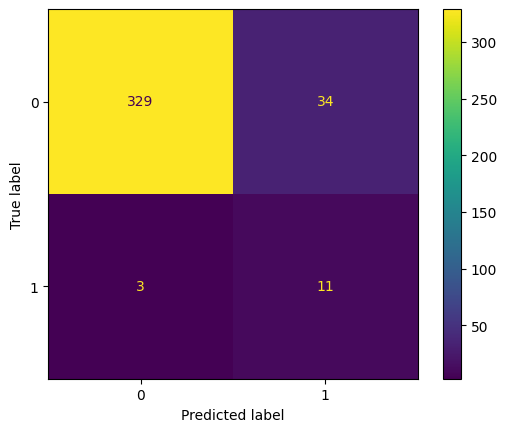

In [107]:
# Calculating for the confusion matrix.
rf_cm = confusion_matrix(y_pred_rfc, y_test, labels= random_forest.classes_)
disp6 = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=random_forest.classes_)
disp6.plot()
plt.show()

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "329" people get approval of credit card.
  * TN - "11" people not get approval of credit card.
  * FP - "34" people not get approval of credit card but model predicted they will get.
  * FN - "3" people get approval of credit card  but model predicted they will not get.

In [108]:
# Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of Random Forest Model : \n",classification_report(y_pred_rfc, y_test))

Classification Report of Random Forest Model : 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       363
           1       0.24      0.79      0.37        14

    accuracy                           0.90       377
   macro avg       0.62      0.85      0.66       377
weighted avg       0.96      0.90      0.93       377



<Axes: xlabel='label', ylabel='Density'>

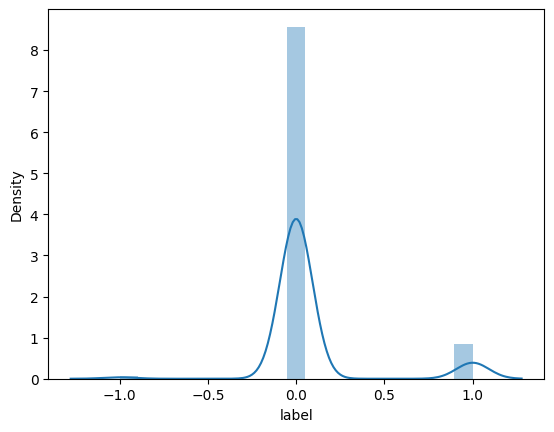

In [109]:
sns.distplot(y_test - y_pred_rfc)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1(value).

#####SMOTE Random Forest

In [110]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_sm, y_train_sm)

# Predicting the result foe the test dataset "X_test".
rf_smotee = rf_smote.predict(X_test)

print("Accuracy of Random Forest Model : {}%".format((accuracy_score(rf_smotee, y_test)*100)))
rf_smote_score = accuracy_score(rf_smotee, y_test)*100

Accuracy of Random Forest Model : 93.10344827586206%


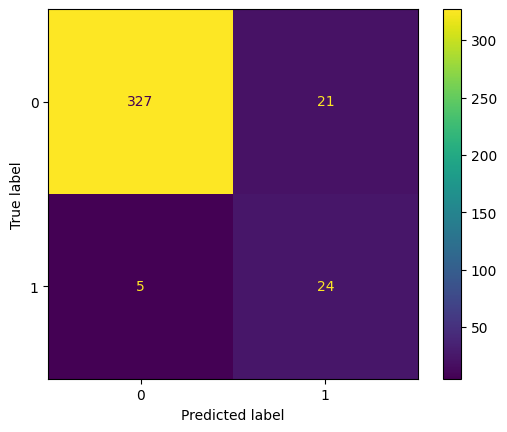

In [111]:
# Calculating for the confusion matrix.
rf_cm_smote = confusion_matrix(rf_smotee, y_test, labels= rf_smote.classes_)
disp6 = ConfusionMatrixDisplay(confusion_matrix=rf_cm_smote, display_labels=rf_smote.classes_)
disp6.plot()
plt.show()

In [112]:
print("Classification Report of Radom Forest Model : \n",classification_report(rf_smotee, y_test))

Classification Report of Radom Forest Model : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       348
           1       0.53      0.83      0.65        29

    accuracy                           0.93       377
   macro avg       0.76      0.88      0.81       377
weighted avg       0.95      0.93      0.94       377



**OBSERVATION** :-
* Reduced the False Positive by 18 that is Credit Card Approval is less for Model for people who are not qualified.
* Accuracy Improved by 3% from 90% to 93% with good precision and recall.

#####Hyper Parameter Tuning for Random Forest Classifier

In [113]:
# Importing GridSearchCV from sklearn.
from sklearn.model_selection import GridSearchCV
parameter_rfc = {"n_estimators" : list(np.arange(10,15,1)),
                 "criterion" : ["gini", "entropy", "log_loss"],
                 "max_depth" : list(np.arange(0,14))}
Classfier_rfc = GridSearchCV(random_forest, param_grid=parameter_rfc, scoring="accuracy", cv=10)

In [114]:
# Fitting the training independent and dependent variable to get trained.
Classfier_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [115]:
# Getting the best parameter from gridsearchcv.
print(Classfier_rfc.best_params_)

# Getting the best score for training the model.
print(Classfier_rfc.best_score_)

# Predicting the result foe the test dataset "X_test".
y_pred_tune_rfc = Classfier_rfc.predict(X_test)

{'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 11}
0.9168141592920355


In [116]:
# Calculating the accuracy for the predicted and actual dataset.
random_forest_tune = accuracy_score(y_pred_tune_rfc, y_test)*100
accuracy_score(y_pred_tune_rfc, y_test)*100

89.12466843501326

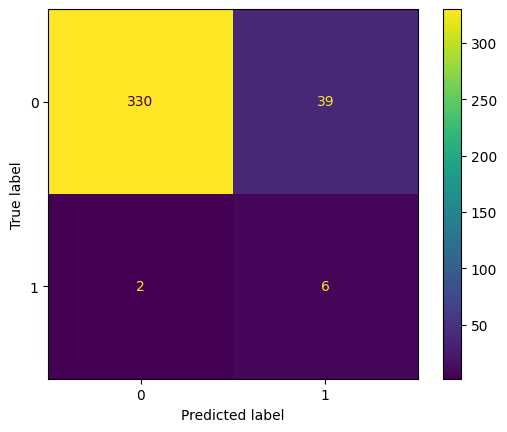

In [117]:
# Calculating for the confusion matrix.
rf_tune_cm = confusion_matrix(y_pred_tune_rfc, y_test, labels= Classfier_rfc.classes_)
disp7 = ConfusionMatrixDisplay(confusion_matrix=rf_tune_cm, display_labels=Classfier_rfc.classes_)
disp7.plot()
plt.show()

In [118]:
#Getting the Classification report for precision, recall & f1-score value.
print(classification_report(y_pred_tune_rfc, y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       369
           1       0.13      0.75      0.23         8

    accuracy                           0.89       377
   macro avg       0.56      0.82      0.58       377
weighted avg       0.98      0.89      0.93       377



**OBSERVATION** :- 
* Tuned Model doesn't help for better accuracy.

##**XGBOOST**

#####Baseline XG Boost

In [119]:
# Importing XGBoost.
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

# Fitting the training independent and dependent variable to get trained.
xgb_classifier.fit(X_train,y_train)

# Predicting the result foe the test dataset "X_test".
y_pred_xgb = xgb_classifier.predict(X_test)

In [120]:
#Calculating the accuracy for the predicted and actual dataset.
accuracy_score(y_pred_xgb, y_test)*100

86.73740053050398

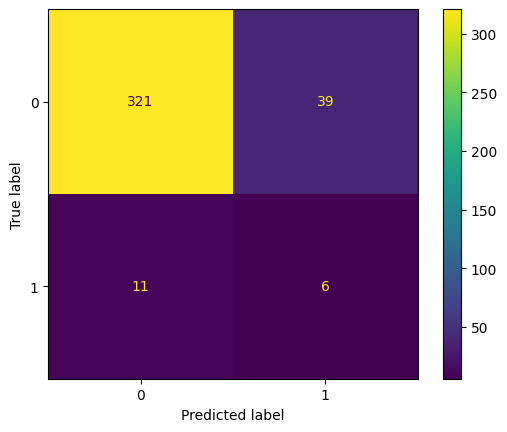

In [121]:
# Calculating for the confusion matrix.
xgb_cm = confusion_matrix(y_pred_xgb, y_test, labels= xgb_classifier.classes_)
disp8 = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp8.plot()
plt.show()

**OBSERVATIONS**
* Model is predicting the following:-
  * TP - "321" people get approval of credit card.
  * TN - "6" people not get approval of credit card.
  * FP - "39" people not get approval of credit card but model predicted they will get.
  * FN - "11" people get approval of credit card  but model predicted they will not get.

In [122]:
# Importing accuracy_score, confusion_matrix, classification_report from sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report of XGBoost Model : \n",classification_report(y_pred_xgb, y_test))

Classification Report of XGBoost Model : 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       360
           1       0.13      0.35      0.19        17

    accuracy                           0.87       377
   macro avg       0.55      0.62      0.56       377
weighted avg       0.93      0.87      0.89       377



<Axes: xlabel='label', ylabel='Density'>

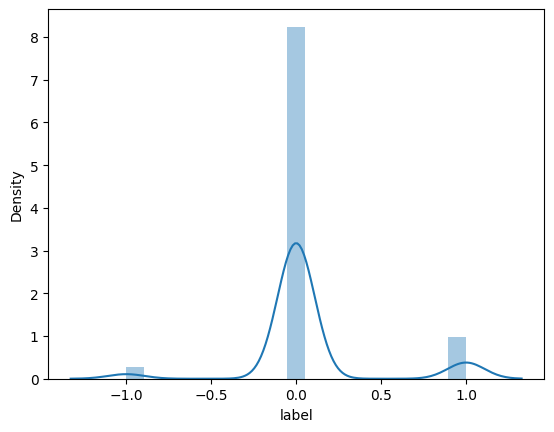

In [123]:
# Plotting the test - predicted graph.
sns.distplot(y_test - y_pred_xgb)

**OBSERVATION**
* It follows Normal Distribution Curve.
* There are less noise(error) at 1(value).

#####SMOTE XG Boost

In [124]:
xgb_smote = xgb.XGBClassifier()
xgb_smote.fit(X_train_sm, y_train_sm)

# Predicting the result foe the test dataset "X_test".
xgb_smotee = xgb_smote.predict(X_test)

print("Accuracy of XGBoost : {}%".format(round(accuracy_score(xgb_smotee, y_test)*100)))
xgb_smote_score = accuracy_score(xgb_smotee, y_test)*100

# Calculating for the confusion matrix.
confusion_matrix(xgb_smotee, y_test)

Accuracy of XGBoost : 91%


array([[321,  22],
       [ 11,  23]])

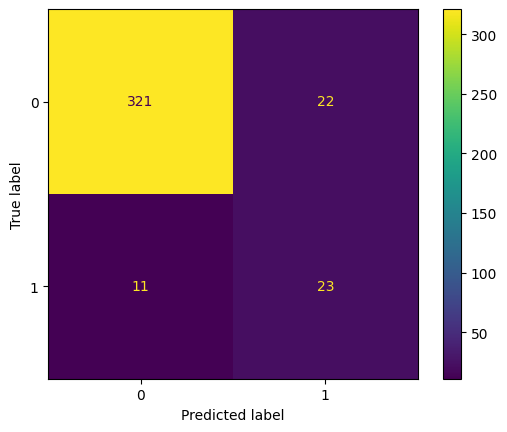

In [125]:
xgb_smote_cm = confusion_matrix(xgb_smotee, y_test, labels= xgb_smote.classes_)
disp9 = ConfusionMatrixDisplay(confusion_matrix=xgb_smote_cm, display_labels=xgb_smote.classes_)
disp9.plot()
plt.show()

OBSERAVTION 
* SMOTE Model is better than Baseline Model.
  * It has better Precision, Recall and F1 Score.
  * Accuracy Improved by 4%.

#**ACCURACY : GRAPH**

#####Baseline Model Graph

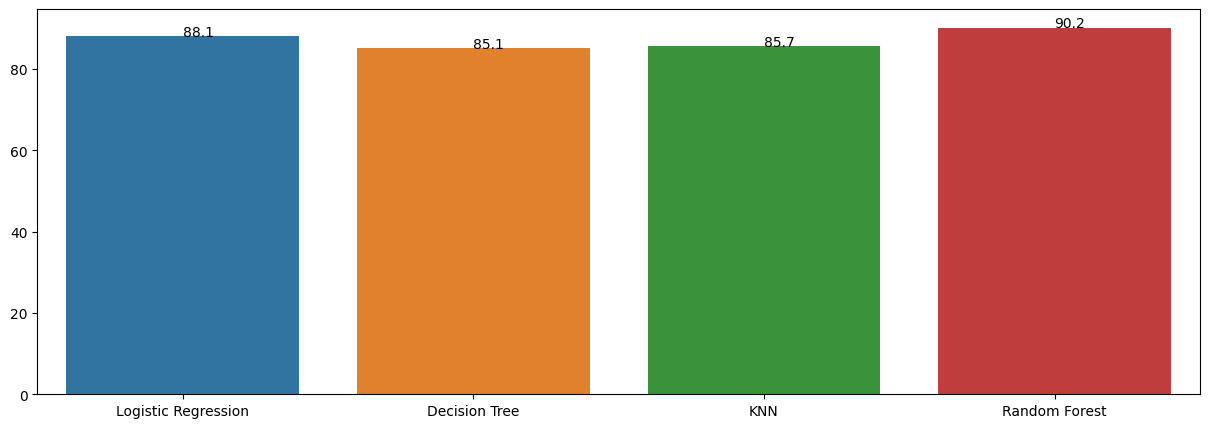

In [126]:
untuned_algo = [Log_reg_untune, dec_tree_untune, knn_untune, random_forest_untune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_untune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "left")
sns.barplot(x= Algo, y = untuned_algo)
addlabels_untune(Algo, Algo_value_untune)

#####SMOTE Algorithm Graph

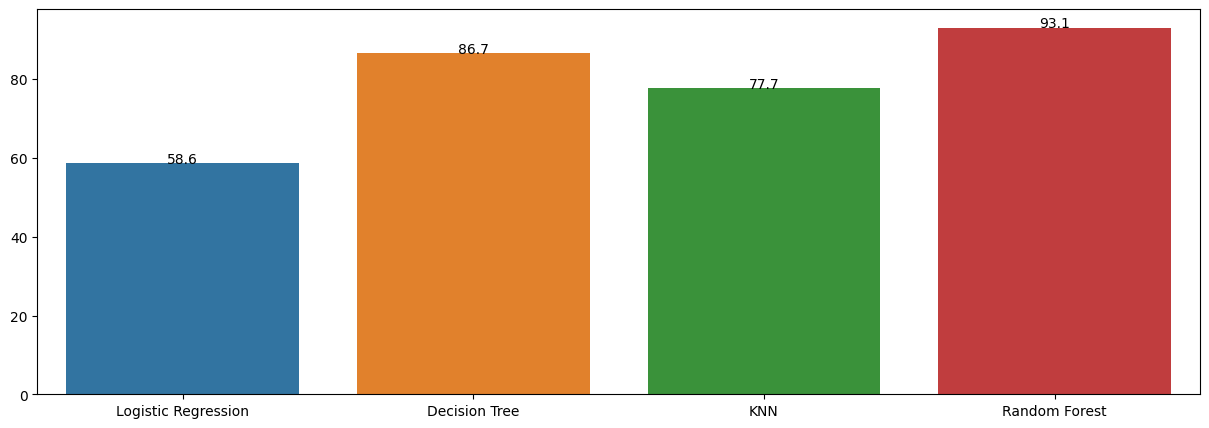

In [127]:
untuned_algo_smote = [lg_smote_score, dt_smote_score, knn_smote_score, rf_smote_score]
Algo_value_untune_smote = []
for i in untuned_algo_smote:
  Algo_value_untune_smote.append(round(i,1))
Algo_smote = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_untune_smote(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "center")
sns.barplot(x= Algo_smote, y = untuned_algo_smote)
addlabels_untune_smote(Algo_smote, Algo_value_untune_smote)

#####Tuned Algorithm Graph

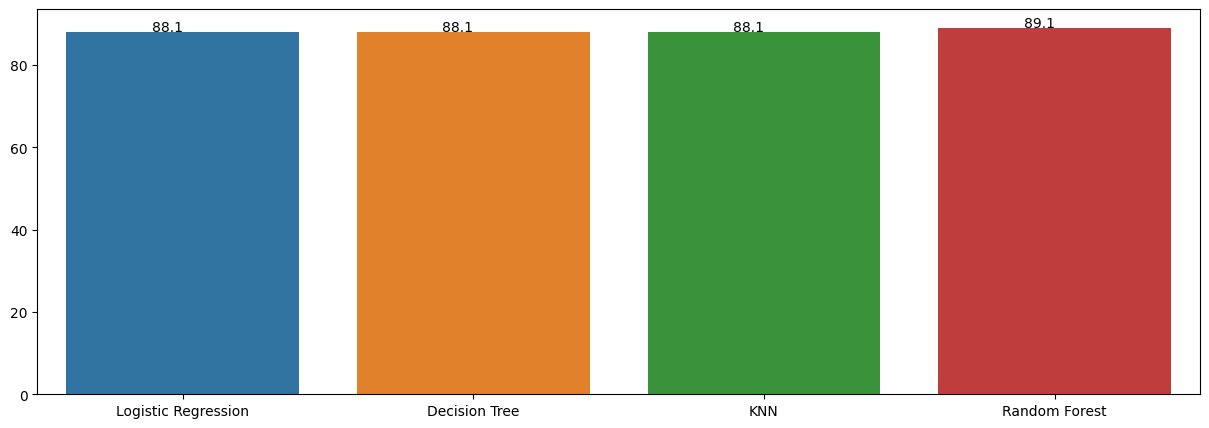

In [128]:
tuned_algo = [Log_reg_tune, dec_tree_tune, knn_tune, random_forest_tune]
Algo_value_tune = []
for i in tuned_algo:
  Algo_value_tune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest"]
plt.figure(figsize=(15,5))
def addlabels_tune(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], horizontalalignment = "right")
sns.barplot(x = Algo, y = Algo_value_tune)
addlabels_tune(Algo, Algo_value_tune)

#####Comparision 

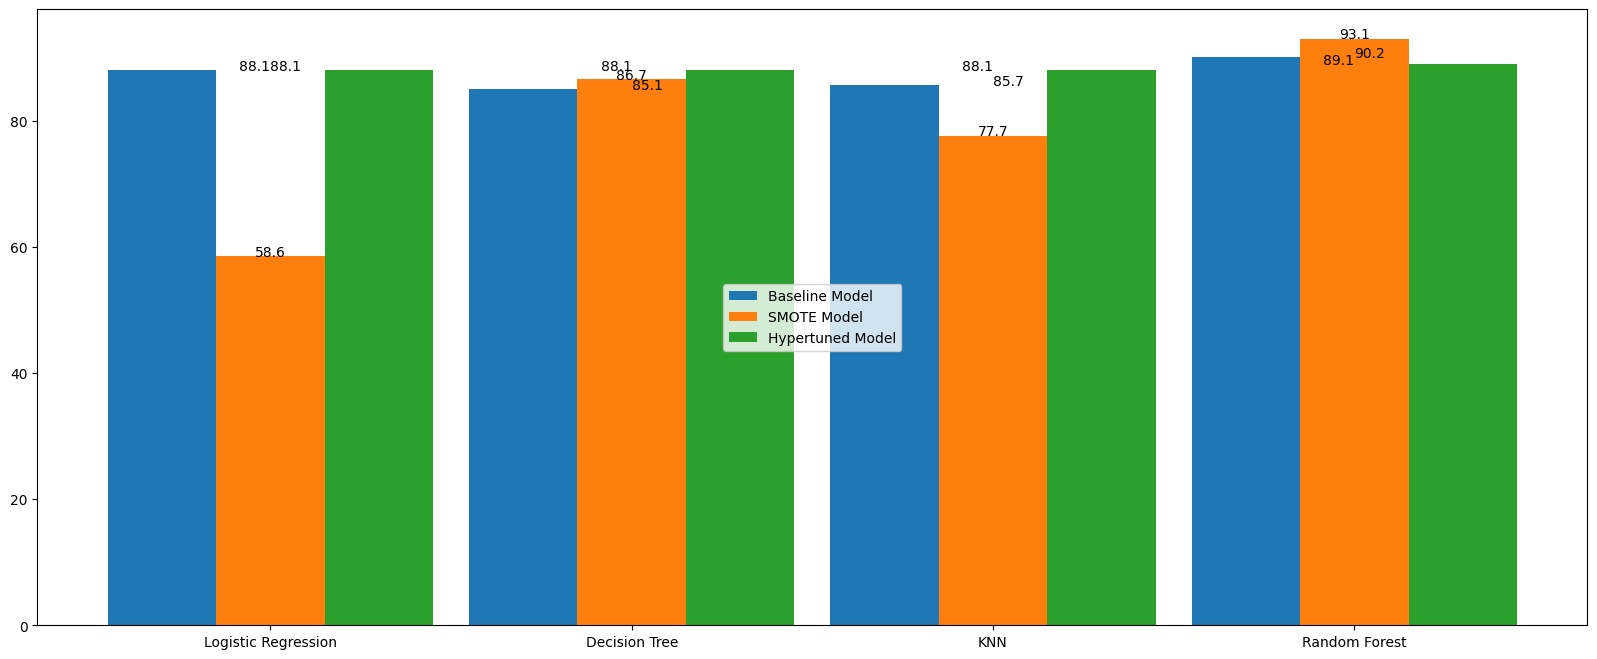

In [129]:
plt.figure(figsize=(20,8))
X_label_algo = np.arange(len(Algo))
plt.bar(X_label_algo-0.3, untuned_algo, 0.3, label = "Baseline Model")
plt.bar(X_label_algo, untuned_algo_smote, 0.3, label = "SMOTE Model")
plt.bar(X_label_algo+0.3, tuned_algo, 0.3, label = "Hypertuned Model" )
plt.xticks(X_label_algo, Algo)
plt.legend(loc = "center")
addlabels_tune(Algo, Algo_value_tune)
addlabels_untune(Algo, Algo_value_untune)
addlabels_untune_smote(Algo_smote, Algo_value_untune_smote)

#**CONCLUSION**

###**OBSERVATION**
* From all the models, **Random Forest SMOTE Model** has better prediction.


  * For **Random Forest "SMOTE" Model** :-.
      * Precision is **93.96%** which is good.
        * i.e, Correct Prediction Rate is 94.23%.
      * Recall is **98.5%** which is also good.
        * Out of all Credit Card Approval, 98.5% is positiviely approved.
      * F1-Score is **96.17%**, it is good.
        * It tell us how good our Precision and Recall is.Here It tells how Correctly our model predicted credit card approval from wrong approval.
      * Accuracy is **93.1%**.
        * It tells out of 100 people, 93 people credit card approval will be correct.
  
###**CONCLUSION**
  * From Random Forest, **Random Forest SMOTE Model gives better prediction and less error**.
    * **Random Forest Model give better Precision, Recall and Accuracy**.
